In [ ]:
#imports
import numpy as np
import pandas as pd
import scipy
import scipy.stats as stats
import matplotlib.pyplot as plt
import random
import plotly.graph_objects as go
import yfinance as yf

import xgboost as xgb
import re
from re import X
import joblib #for model artifacts

#sklearn imports
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [ ]:
! gdown 1_u76h_fgmY4RTdEi6ZZYuBYZmsJ2suG1
! gdown 1Ae0JK5KRCCycUX2tyk_kcdxpFEvsgYfd

Downloading...
From: https://drive.google.com/uc?id=1_u76h_fgmY4RTdEi6ZZYuBYZmsJ2suG1
To: /content/kaggle2024.par
100% 173k/173k [00:00<00:00, 78.2MB/s]
Downloading...
From: https://drive.google.com/uc?id=1Ae0JK5KRCCycUX2tyk_kcdxpFEvsgYfd
To: /content/kaggle2025_public.par
100% 95.6k/95.6k [00:00<00:00, 59.8MB/s]


In [ ]:
import pandas as pd
pd.read_parquet('kaggle2024.par')

,RETURN,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56
0,-0.002120,0.000000,0.000000,0.0,0.0,0.0,0.0,0.00000,0.0000,0.00000,...,0.001440,-0.006244,0.003265,0.028279,0.025483,0.053900,0.044247,0.016168,0.0,0.0
1,-0.019100,0.000000,0.000000,0.0,0.0,0.0,0.0,-1.12380,-0.9365,0.00000,...,-0.001227,0.001440,-0.013848,-0.010628,0.014039,0.011283,0.039306,0.016462,0.0,0.0
2,-0.046586,0.000000,0.000000,1.0,0.0,0.0,0.0,-0.14940,-0.1245,-1.12380,...,-0.004525,-0.001227,0.002065,-0.011811,-0.008584,0.016134,0.013371,0.016319,1.0,0.0
3,0.000000,0.000000,-0.772747,1.0,0.0,0.0,1.0,-0.27216,-0.2268,-0.14940,...,0.003315,-0.004525,-0.009280,-0.007234,-0.020981,-0.017785,0.006704,0.016310,1.0,1.0
4,0.012568,0.000000,-1.987177,1.0,0.0,0.0,1.0,-1.17420,-0.9785,-0.27216,...,-0.007028,0.003315,-0.003544,-0.012791,-0.010752,-0.024451,-0.021265,0.016958,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
361,-0.017119,-0.735665,-0.025816,1.0,0.0,0.0,1.0,-1.20000,-1.3567,-1.20000,...,0.004716,-0.000249,-0.019464,-0.029004,-0.034629,-0.020138,-0.018049,0.010339,1.0,1.0
362,0.016633,-1.275296,-0.457768,1.0,0.0,0.0,1.0,-1.20000,-1.3323,-1.20000,...,-0.005978,0.004716,-0.012622,-0.031840,-0.041260,-0.046814,-0.032506,0.010773,1.0,1.0
363,-0.028499,-1.335801,-1.888775,0.0,0.0,0.0,0.0,0.00000,0.0000,-1.20000,...,0.000711,-0.005978,0.003961,-0.008711,-0.028006,-0.037462,-0.043038,0.010909,0.0,0.0
364,-0.004521,-1.426765,-2.000000,1.0,0.0,0.0,0.0,-0.45216,-0.3768,0.00000,...,-0.002632,0.000711,-0.001306,0.002650,-0.010006,-0.029275,-0.038719,0.010919,0.0,0.0


#Create the df

In [ ]:
Stock_df = pd.read_parquet('kaggle2024.par')

#Feature exploration and correlation analysis

In [ ]:
import pandas as pd

corr_matrix= Stock_df.corr(method="spearman", numeric_only=True)
file_path = "/content/sample_data/correlation_matrix.xlsx"

corr_matrix.to_excel(file_path, sheet_name="Correlations", index=True)
print(f"Correlation matrix written to {file_path}")


Correlation matrix written to /content/sample_data/correlation_matrix.xlsx


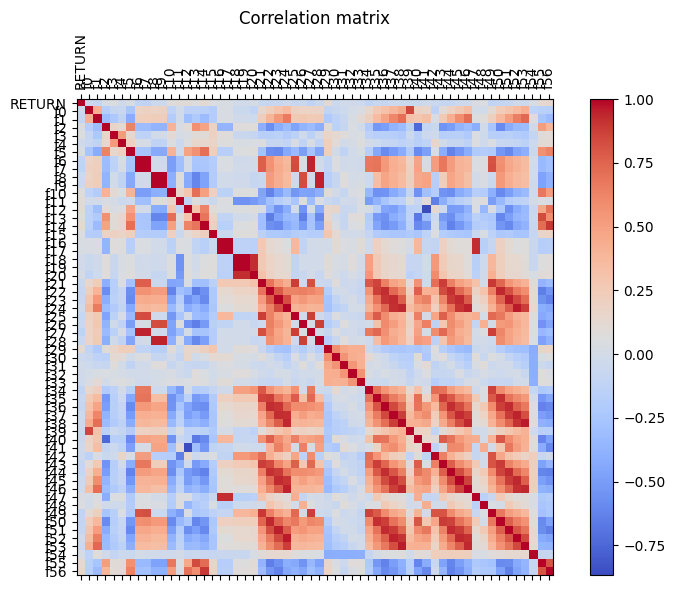

In [ ]:
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")   # blue → red gradient
fig.colorbar(cax)

# Axis ticks & labels
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
from sklearn.preprocessing import StandardScaler
import umap  # `import umap` is the canonical import, even though the class is UMAP
import matplotlib.pyplot as plt


# 1️⃣ Keep just the numeric features you want UMAP to see
num_df = Stock_df.drop(columns=["RETURN"])

# 2️⃣ Scale each feature to zero-mean / unit-variance (UMAP benefits from this)
X = StandardScaler().fit_transform(num_df.values)

reducer = umap.UMAP(
    n_components=28,      # → 2-D embedding for plotting (use 3 for 3-D, etc.)
    n_neighbors=15,      # local vs. global structure trade-off
    min_dist=0.1,        # how tightly points pack together
    metric="euclidean",  # distance function in the input space
    random_state=42
)

embedding = reducer.fit_transform(X)  # shape: (n_samples, n_components)

# --- NEW BLOCK ----------------------------------------------------
# ➊ Wrap the 14-D UMAP array in a DataFrame
umap_cols = [f"UMAP{i+1}" for i in range(embedding.shape[1])]
umap_df   = pd.DataFrame(embedding,
                         columns=umap_cols,
                         index=Stock_df.index)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning: 'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/umap/umap_.py:1952: UserWarning: n_jobs value 1 overridden to 1 by setting random_state. Use no seed for parallelism.
  warn(


In [ ]:
umap_df.shape

(366, 28)

Correlation matrix written to /content/sample_data/correlation_matrix.xlsx


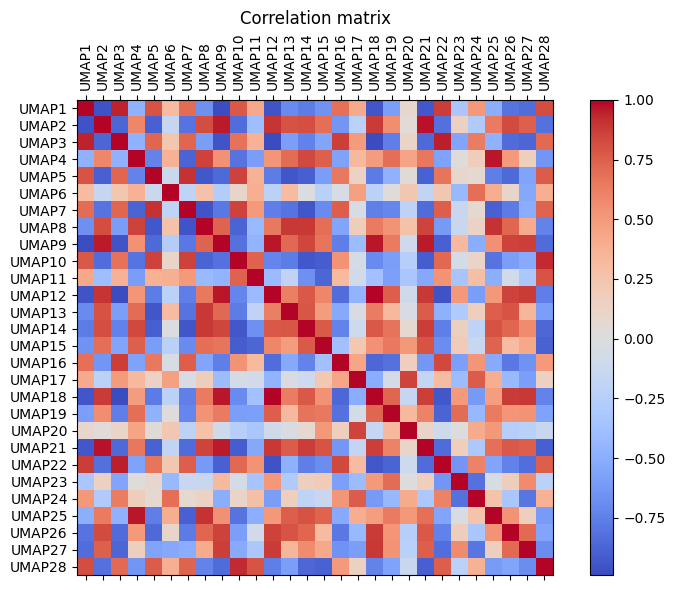

In [ ]:
import matplotlib.pyplot as plt


corr_matrix= umap_df.corr(method="spearman", numeric_only=True)

corr_matrix.to_excel(file_path, sheet_name="Correlations", index=True)
print(f"Correlation matrix written to {file_path}")


fig, ax = plt.subplots(figsize=(8, 6))
cax = ax.matshow(corr_matrix, cmap="coolwarm")   # blue → red gradient
fig.colorbar(cax)

# Axis ticks & labels
ticks = range(len(corr_matrix.columns))
ax.set_xticks(ticks)
ax.set_yticks(ticks)
ax.set_xticklabels(corr_matrix.columns, rotation=90)
ax.set_yticklabels(corr_matrix.columns)

plt.title("Correlation matrix")
plt.tight_layout()
plt.show()


In [ ]:
#drop 195 and 15 since they are outliers
'''
Stock_df = Stock_df.drop([195, 15])
'''
#removing outliers didn't help the fit.
#Data is small and sensitive so removing made things worse for 2024 (down 2%), but bumped correlations up to 19% for 2025
#puting on hold for now, removing just two rows affecting the data this much shows we probably need more data to make a significant estimation


'\nStock_df = Stock_df.drop([195, 15])\n'

In [ ]:
#separate returns into a predictions column
y = Stock_df['RETURN']
X = umap_df

In [ ]:
import xgboost as xgb
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.model_selection import GridSearchCV, train_test_split

# Split into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.2, random_state=42)


# Define the XGBoost Regressor
model = xgb.XGBRegressor(
    objective='reg:squarederror',  # Use squared error for regression
    random_state=42
)

# Fit the model

#gridsearch
param_grid = {
    'n_estimators': [100, 1000],
    'max_depth': [3, 5],
    'learning_rate': [0.01],
    'alpha': [0, 0.5, 1],       # L1 regularization
}

grid_search = GridSearchCV(
    estimator=model,
    param_grid=param_grid,
    scoring='neg_mean_absolute_error',
    cv=5,
    verbose=3,
    n_jobs=-1
)

grid_search.fit(X_train, y_train)

# Predict
model = grid_search.best_estimator_
y_pred = model.predict(X_test)
# Evaluate performance

mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse:f}")
#r squared
from sklearn.metrics import r2_score
r2 = r2_score(y_test, y_pred)
print(f"R-squared: {r2:f}")

Fitting 5 folds for each of 12 candidates, totalling 60 fits
Mean Squared Error: 0.001747
R-squared: 0.001279


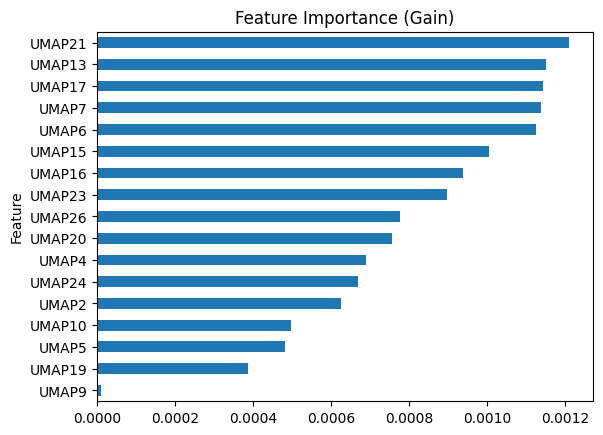

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Get feature importances
importance = model.get_booster().get_score(importance_type='gain')
importance_df = pd.DataFrame({'Feature': list(importance.keys()), 'Importance': list(importance.values())})
importance_df.sort_values(by='Importance', ascending=False, inplace=True)

# Plot
importance_df.plot(kind='barh', x='Feature', y='Importance', legend=False)
plt.title('Feature Importance (Gain)')
plt.gca().invert_yaxis()
plt.show()

In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Build DataFrame
plot_df = pd.DataFrame({
    'Actual_Returns': np.array(y_test),
    'Predicted_Returns': np.array(y_pred)
})

# Add an index for x-axis
plot_df['Index'] = plot_df.index

# Create bar traces
fig = go.Figure(data=[
    go.Bar(name='Actual', x=plot_df['Index'], y=plot_df['Actual_Returns']),
    go.Bar(name='Predicted', x=plot_df['Index'], y=plot_df['Predicted_Returns'])
])

# Customize layout
fig.update_layout(
    title='Actual vs Predicted Returns',
    xaxis_title='Sample Index',
    yaxis_title='Return Value',
    barmode='group',  # Bars side by side
    template='plotly_white'
)

# Show plot
fig.show()


In [ ]:
#calculate Information Coefficient (IC)
#2024 score
IC = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Information Coefficient (IC): {IC:f}")

Information Coefficient (IC): 0.208072


In [ ]:
#train on whole dataset to improve results for 2025
model.fit(X, y)

XGBRegressor(alpha=0.5, base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.01, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=5, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=100, n_jobs=None,
             num_parallel_tree=None, ...)

In [ ]:
y_pred = model.predict(X_test)
IC = np.corrcoef(y_test, y_pred)[0, 1]
print(f"Information Coefficient (IC): {IC:f}")

Information Coefficient (IC): 0.633934


In [ ]:
#just showing everything
import pandas as pd
import plotly.graph_objects as go

# Build DataFrame
plot_df = pd.DataFrame({
    'Actual_Returns': np.array(y_test),
    'Predicted_Returns': np.array(y_pred*8)
})

# Add an index for x-axis
plot_df['Index'] = plot_df.index

# Create bar traces
fig = go.Figure(data=[
    go.Bar(name='Actual', x=plot_df['Index'], y=plot_df['Actual_Returns']),
    go.Bar(name='Predicted', x=plot_df['Index'], y=plot_df['Predicted_Returns'])
])

# Customize layout
fig.update_layout(
    title='Actual vs Predicted Returns',
    xaxis_title='Sample Index',
    yaxis_title='Return Value',
    barmode='group',  # Bars side by side
    template='plotly_white'
)

# Show plot
fig.show()

In [ ]:
# Kaggle Public test set for the public leadership board
df2025 = pd.read_parquet('kaggle2025_public.par')
df2025

,RETURN,f0,f1,f2,f3,f4,f5,f6,f7,f8,...,f47,f48,f49,f50,f51,f52,f53,f54,f55,f56
0,-0.006368,-0.632685,0.000000,1.0,1.0,1.0,0.0,0.00000,0.0000,-0.13968,...,-0.003362,0.000650,0.006293,0.001742,0.001362,0.004080,0.018576,0.008011,1.0,0.0
2,0.000841,-0.784511,-2.000000,1.0,1.0,1.0,0.0,-1.07688,-0.8974,-0.10056,...,-0.001163,0.004726,-0.004586,-0.006578,-0.000326,-0.004847,-0.005224,0.007729,0.0,0.0
4,-0.001109,-0.980434,-2.000000,1.0,1.0,1.0,1.0,-1.20000,-1.1882,-0.16332,...,-0.005522,0.004428,-0.007178,-0.014004,-0.018527,-0.020490,-0.014326,0.008356,0.0,0.0
6,-0.012705,-0.933964,-2.000000,1.0,1.0,1.0,1.0,-1.20000,-1.4451,-0.32340,...,-0.009371,0.004760,-0.013184,-0.025067,-0.032066,-0.038720,-0.043129,0.009577,1.0,1.0
8,-0.040562,-1.046579,-1.225276,1.0,0.0,0.0,1.0,0.00000,0.0000,-1.20000,...,0.005657,0.001285,0.016444,0.000811,-0.012384,-0.024276,-0.031280,0.010598,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
302,-0.096366,0.000000,-0.527778,1.0,0.0,0.0,0.0,0.00000,0.0000,0.00000,...,-0.016225,0.003954,0.002615,-0.002180,-0.001759,-0.014142,-0.042667,0.023408,0.0,0.0
304,0.040818,-0.058106,-0.126760,0.0,0.0,0.0,0.0,0.00000,0.0000,-1.20000,...,0.019126,-0.014142,0.015501,-0.032488,-0.029958,-0.034598,-0.034190,0.030243,1.0,1.0
306,-0.069825,-0.174920,-0.310168,0.5,0.0,0.0,0.0,-1.20000,-1.5000,0.00000,...,-0.009571,-0.006204,-0.018176,-0.020904,-0.005727,-0.052713,-0.050236,0.031054,0.0,0.0
308,-0.120934,-0.418761,-0.353556,1.0,0.0,0.0,1.0,-1.20000,-1.5000,-1.20000,...,-0.028916,0.009029,-0.002887,-0.053340,-0.070547,-0.073129,-0.058762,0.032140,1.0,1.0


In [ ]:
#umap df2025
num_df = df2025.drop(columns=["RETURN"])
X = StandardScaler().fit_transform(num_df.values)
embedding = reducer.fit_transform(X)  # shape: (n_samples, n_components)

umap_cols = [f"UMAP{i+1}" for i in range(embedding.shape[1])]
umap_df25   = pd.DataFrame(embedding,
                         columns=umap_cols,
                         index=df2025.index)

/usr/local/lib/python3.11/dist-packages/sklearn/utils/deprecation.py:151: FutureWarning:

'force_all_finite' was renamed to 'ensure_all_finite' in 1.6 and will be removed in 1.8.



In [ ]:
y25 = df2025['RETURN']
X25 = umap_df25

In [ ]:
#predict using xgboos model
y_pred25 = model.predict(X25)
#get
y25 = np.array(y25)
y_pred25 = np.array(y_pred25)
mse = mean_squared_error(y25, y_pred25)
print(f"Mean Squared Error: {mse:f}")
#r squared
r2 = r2_score(y25, y_pred25)
print(f"R-squared: {r2:f}")


Mean Squared Error: 0.001068
R-squared: -0.015556


In [ ]:
#calculate Information Coefficient (IC)
#2025 score
IC = np.corrcoef(y25, y_pred25)[0, 1]
print(f"Information Coefficient (IC): {IC:f}")

Information Coefficient (IC): -0.119820


In [ ]:
import pandas as pd
import plotly.graph_objects as go

# Build DataFrame
plot_df = pd.DataFrame({
    'Actual_Returns': y25,
    'Predicted_Returns': y_pred25 *-1
})

# Add an index for x-axis
plot_df['Index'] = plot_df.index

# Create bar traces
fig = go.Figure(data=[
    go.Bar(name='Actual', x=plot_df['Index'], y=plot_df['Actual_Returns']),
    go.Bar(name='Predicted', x=plot_df['Index'], y=plot_df['Predicted_Returns'])
])

# Customize layout
fig.update_layout(
    title='Actual vs Predicted Returns',
    xaxis_title='Sample Index',
    yaxis_title='Return Value',
    barmode='group',  # Bars side by side
    template='plotly_white'
)

# Show plot
fig.show()


#Model selection reasoning

1. XGBoost (Extreme Gradient Boosting)
✅ Good for tabular data

✅ Handles non-linearities and interactions well

✅ Fast and efficient

✅ Supports regularization (reduces overfitting)

🧠 Loss functions: mean squared error (MSE), mean absolute error (MAE)

#Potential limitations of your approach

dataset was way too small to make any useful continuous predictions

Saw a kaggle user say:

"For regression models, you should provide at least 50 times as many rows as the number of columns. Your dataset must always include at least 1,000 rows."

our dataset meets niether of these criteria